#  <u>Exploratory Data Analysis</u> on *Algerian Forest Fires Dataset*

In [1]:
import pandas as pd
import pymongo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore') 

In [2]:
ds = pd.read_csv('forest_fire_dataset.csv', header=1)
ds.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Adding and Uploading the Data to MongoDB

In [3]:
# Establish a connection to MongoDB
connection_string = 'mongodb+srv://botzaifa:<password>@cluster0.cfcrvb4.mongodb.net/'
client = pymongo.MongoClient(connection_string)

# Access the desired database
db = client['test2'] 

# Convert Dataframe into Dictionary as MongoDB stores data in records/documents
data = ds.to_dict(orient='records')

# Insert records in the dataset into MongoDB collection "fire_records"
collection = db['fire_records']
collection.insert_many(data)

print("All the Data has been Exported to MongoDB Successfully :)")

All the Data has been Exported to MongoDB Successfully :)


## Load Data from MongoDB

In [ ]:
# Retrieve all records from the collection
all_records = collection.find()

# Print each record
for record in all_records:
    print(record)

In [5]:
# Retrieve all records from the collection
all_records = collection.find()

# Convert cursor to DataFrame
df = pd.DataFrame(all_records)

# Drop the '_id' column if it exists
if '_id' in df.columns:
    df.drop('_id', axis=1, inplace=True)

# Print the number of rows in the DataFrame
print("Number of rows:", len(df))

# Display the first few rows of the DataFrame
df.head()

Number of rows: 246


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.shape

(246, 14)

In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [9]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

- The Dataset contains Null values so we have to drop those first

In [10]:
# Columns which has null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [11]:
# Dropping the na or null values
df.dropna(inplace=True)

In [12]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

- All Null values have been dropped

In [13]:
df.duplicated().sum()

0

- It has no duplicate values

In [14]:
df.nunique()

day             32
month            5
year             2
Temperature     20
 RH             63
 Ws             19
Rain            40
FFMC           174
DMC            166
DC             198
ISI            107
BUI            174
FWI            127
Classes          9
dtype: int64

### The dataset is converted into two sets based on Region from 122th index, 
we can make a new column based on the Region 

 1. Bejaia Region Dataset
 
 2. Sidi-Bel Abbes Region Dataset

In [15]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [17]:
df.shape

(244, 15)

In [18]:
# Column which has string
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [19]:
# List out column names to check 
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

- The column names are not proper that is they have blank spaces in between names
Eg: '    RH' and 'Classes    '

In [20]:
# Correcting the column names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Data Manipulation

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 37.6+ KB


- The Datatypes are stored as 'object' so converting them into 'float' values

In [22]:
# Target columns: 
columns_to_convert = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

# Changing the other columns to Float data type
columns_to_convert = [col for col in df.columns if col != 'Classes' and col not in columns_to_convert]

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Print the number of rows in the DataFrame
print("Number of rows:", len(df))

# Display the first few rows of the DataFrame
df.head()

Number of rows: 244


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [23]:
# Specify columns to convert 
columns_to_convert = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']

# Convert columns to integers, handling missing values
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Print the number of rows in the DataFrame
print("Number of rows:", len(df))

# Display the first few rows of the DataFrame
df.head()

Number of rows: 244


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [24]:
# Final datatypes check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(13), int32(1), object(1)
memory usage: 37.6+ KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [26]:
# Check Unique values of target variable
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: Classes, dtype: int64

- There are misspaced values so removing them

In [28]:
# Removing the irregular spaces in between
df.Classes = df.Classes.str.strip()
df.Classes.value_counts()

fire        137
not fire    106
Classes       1
Name: Classes, dtype: int64

- There is an error in the data which contains 'Classes' as a data itself

In [29]:
# Drop rows where 'Classes' is not 'fire' or 'not fire'
valid_classes = ['fire', 'not fire']
df = df[df['Classes'].isin(valid_classes)]

# Reset the index to start from 0 and go up
df.reset_index(drop=True, inplace=True)

# # Print the count of each class
# class_counts = df['Classes'].value_counts()
# print(class_counts)

# # Print the number of rows in the DataFrame
# print("Number of rows:", len(df))

fire        137
not fire    106
Name: Classes, dtype: int64
Number of rows: 243


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [30]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

## Spliting and saving into different csv's (for future use)

### Region - 1 : Bejaia Region

In [31]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26.0,9.0,2012.0,31.0,54.0,11.0,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27.0,9.0,2012.0,31.0,66.0,11.0,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28.0,9.0,2012.0,32.0,47.0,14.0,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29.0,9.0,2012.0,26.0,80.0,16.0,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


### Region - 2 : Sidi-Bel Abbes Region

In [32]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1.0,6.0,2012.0,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2.0,6.0,2012.0,30.0,73.0,13.0,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3.0,6.0,2012.0,29.0,80.0,14.0,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4.0,6.0,2012.0,30.0,64.0,14.0,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5.0,6.0,2012.0,32.0,60.0,14.0,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [33]:
# # Saving the files:
# # Split the dataset based on regions
# region1_df = df[:122]  # Bejaia Region
# region2_df = df[122:]  # Sidi-Bel Abbes Region

# # Save the split DataFrames to separate CSV files
# region1_df.to_csv('Region1_Bejaia.csv', index=False)
# region2_df.to_csv('Region2_Sidi-Bel-Abbes.csv', index=False)

# Visualization

## 1. Visualizing the data with some specific Features

In [35]:
#Droping Year features 
df1 = df.drop(['day','month','year'], axis=1)

In [36]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [37]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


## Finding Correlation

In [51]:
# Compute the correlation matrix
corr_matrix = df1.corr()

# Select the columns for the heatmap based on correlation with 'Classes'
k = len(df1.columns)
cols = corr_matrix.nlargest(k, 'Classes')['Classes'].index

# Calculate the correlation coefficients
cm = np.corrcoef(df1[cols].values.T)

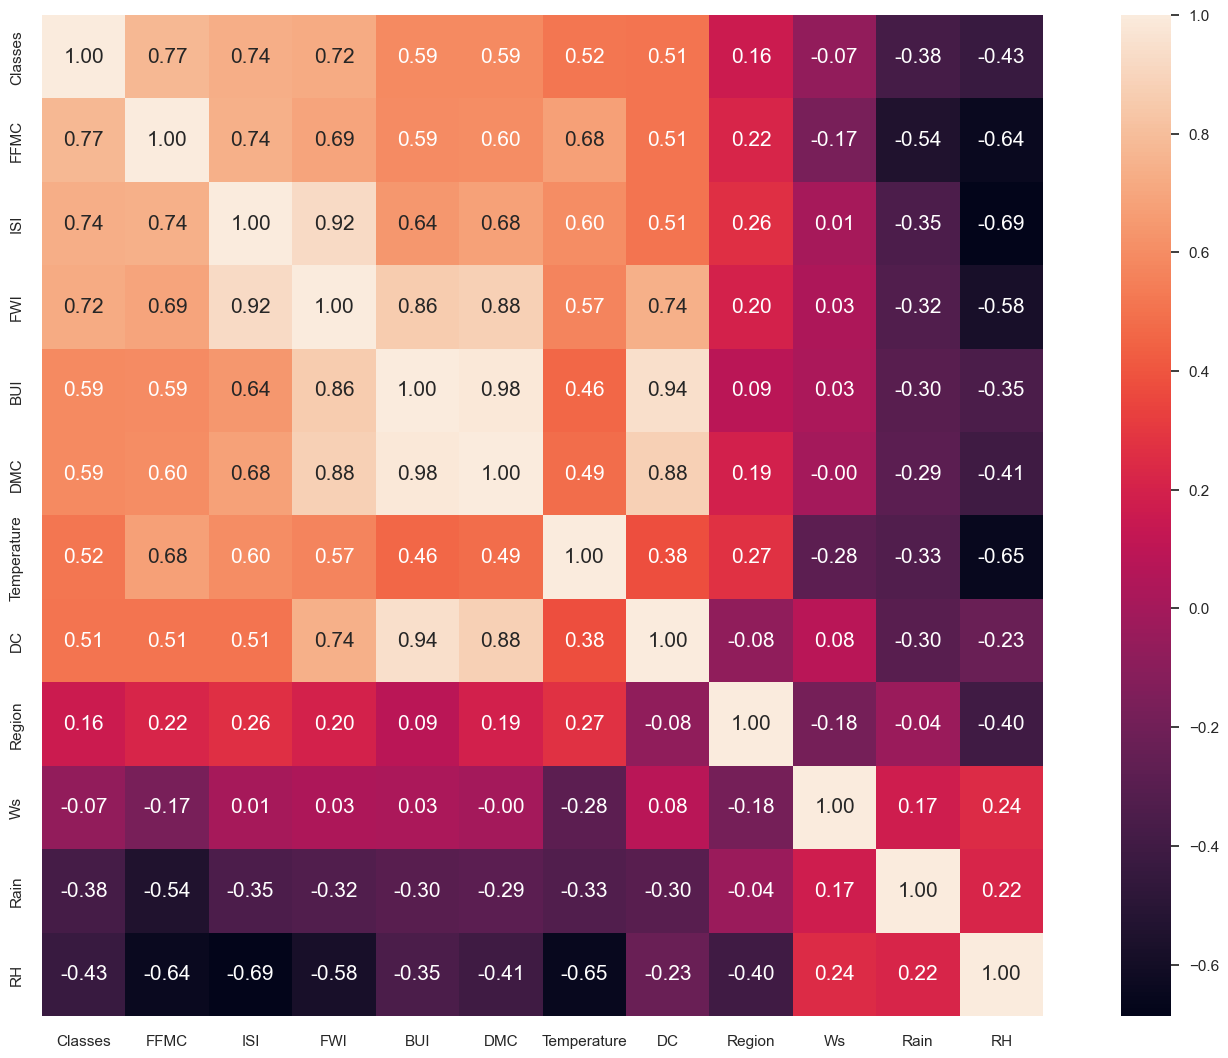

In [53]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(20, 13))
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- The Features such as RH, Rain, Ws and Region has the least correlation as compared to the other features present in the dataset

## Creating a PieChart

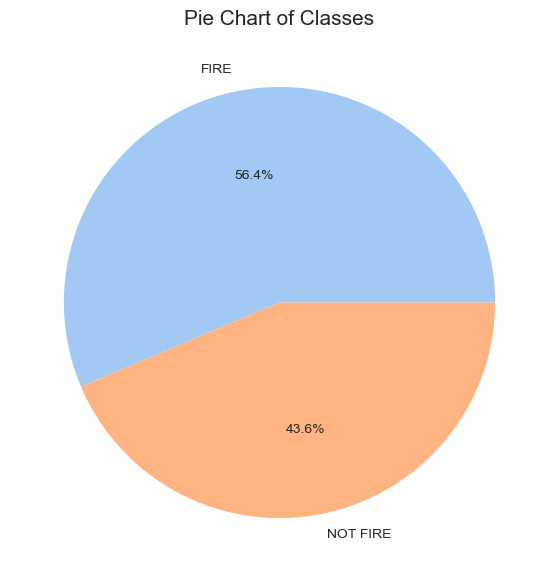

In [41]:
percentage = df.Classes.value_counts(normalize=True)*100
classeslabels = ["FIRE", "NOT FIRE"]
plt.figure(figsize =(12, 7))
colors = sns.color_palette('pastel')[0:7]
plt.pie(percentage,labels = classeslabels,colors=colors, autopct='%1.1f%%')  
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show() 

## Plotting density plot for all features

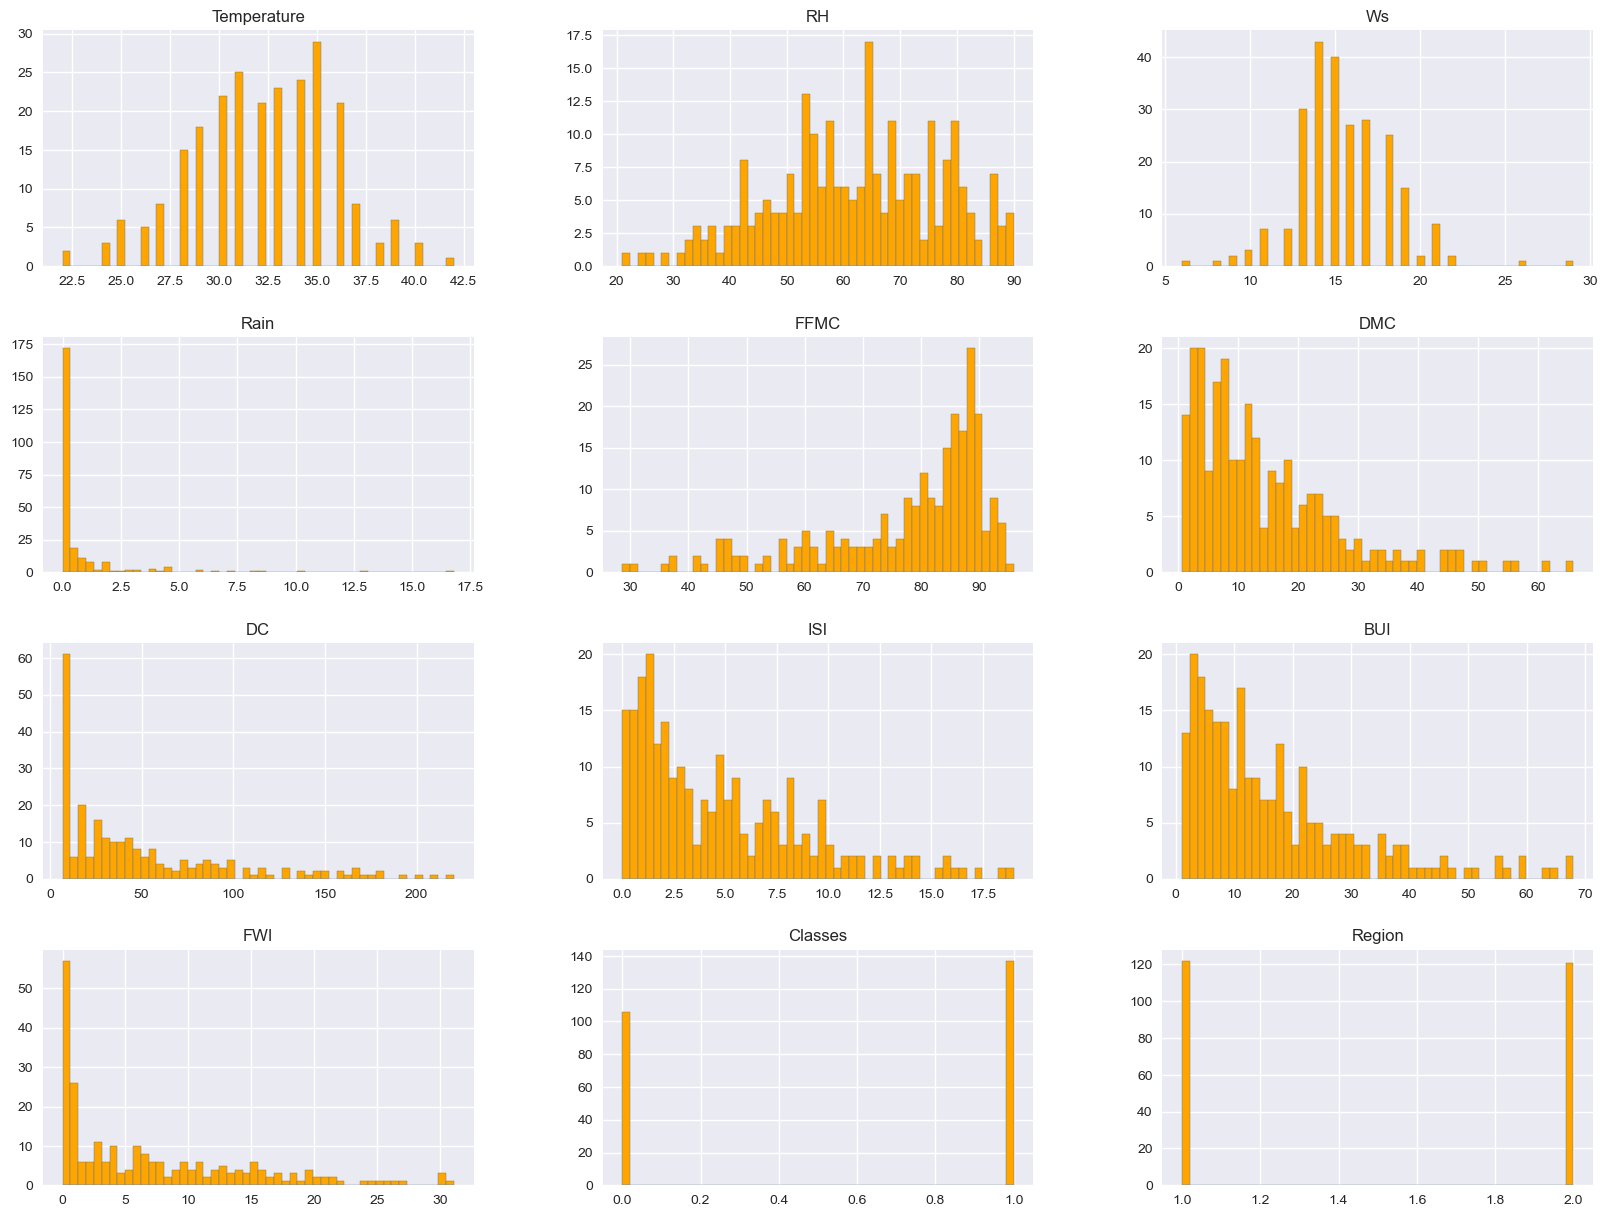

In [54]:
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), color="orange", ec = 'b')
plt.show()

## Month wise Fire analysis 

### 1. For Bejaia region

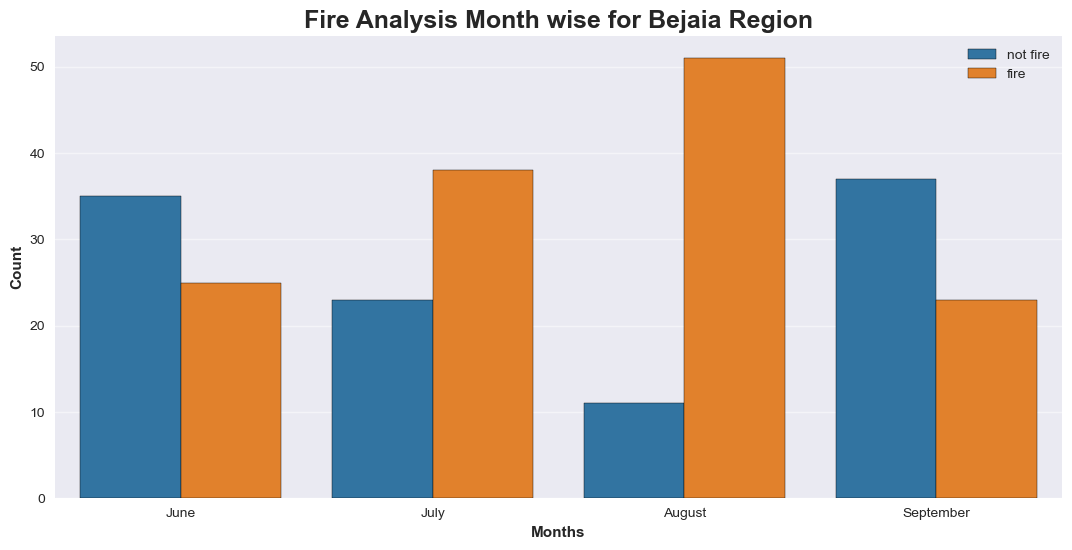

In [50]:
plt.style.use('seaborn')
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', 
              color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

### 2. For Sidi-Bel Abbes Region

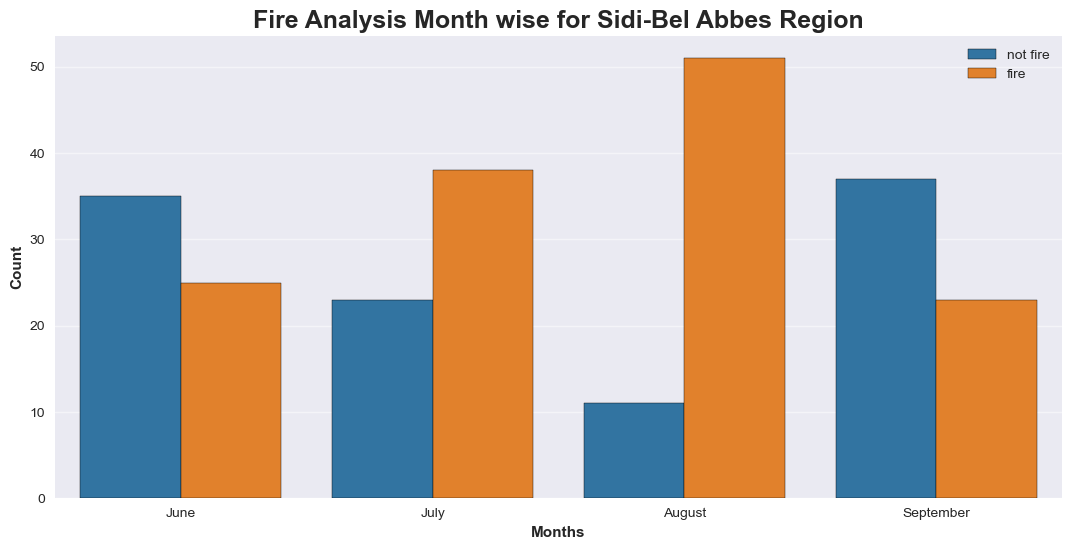

In [48]:
plt.style.use('seaborn')
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', 
              color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

* Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

* Most of the fires happened in August and very high Fires happened in only 3 months - **June, July and August.**

* Less Fires was on September

## Creating a Boxplot

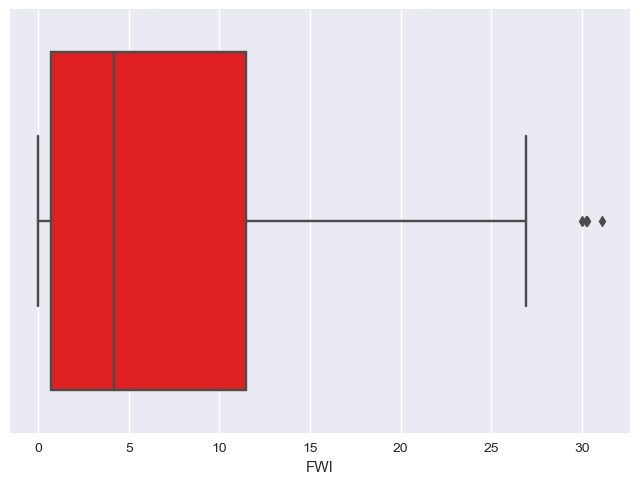

In [44]:
ax = sns.boxplot(df['FWI'], color= 'red')

- The data is not truely free as there are still some **Outliers Present** in the data

## 2. Vizualizing the data with all Features

In [55]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [56]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

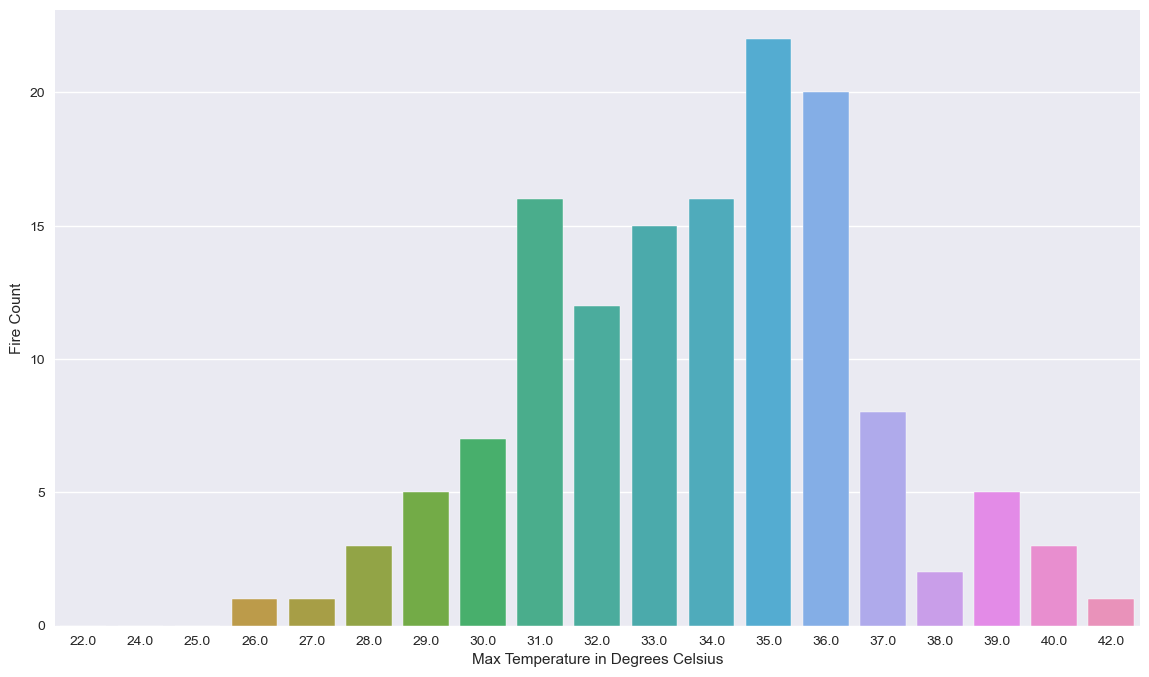

In [57]:
barchart('Temperature','Max Temperature in Degrees Celsius')

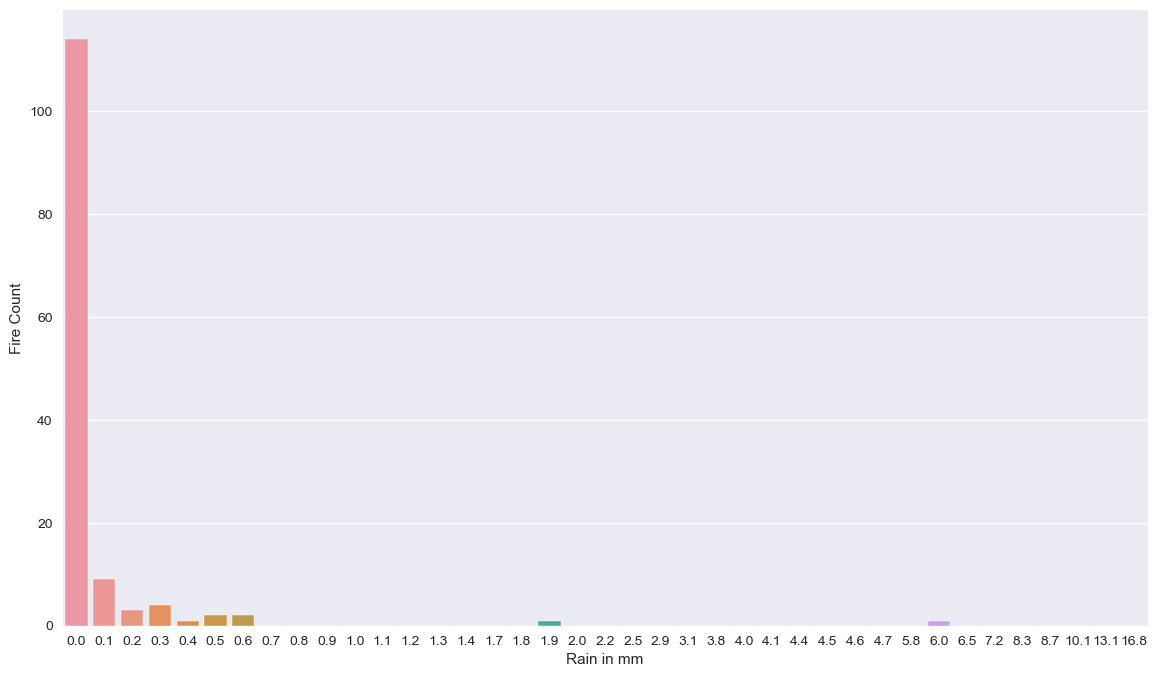

In [58]:
barchart('Rain', 'Rain in mm')

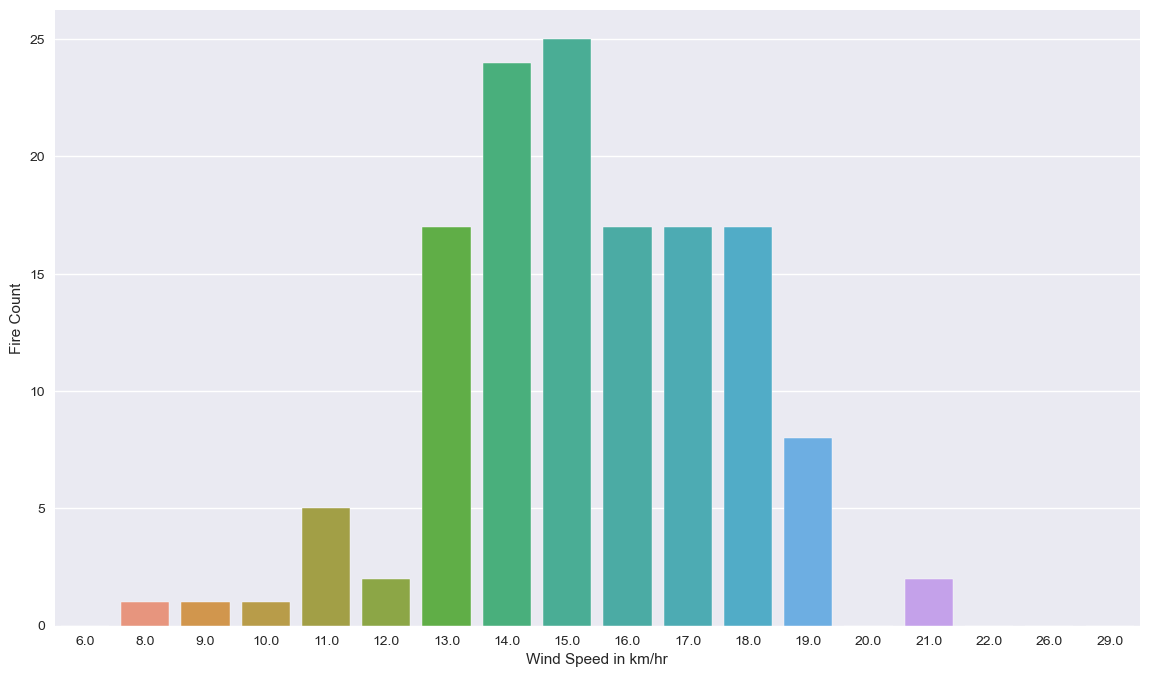

In [59]:
barchart('Ws', 'Wind Speed in km/hr')

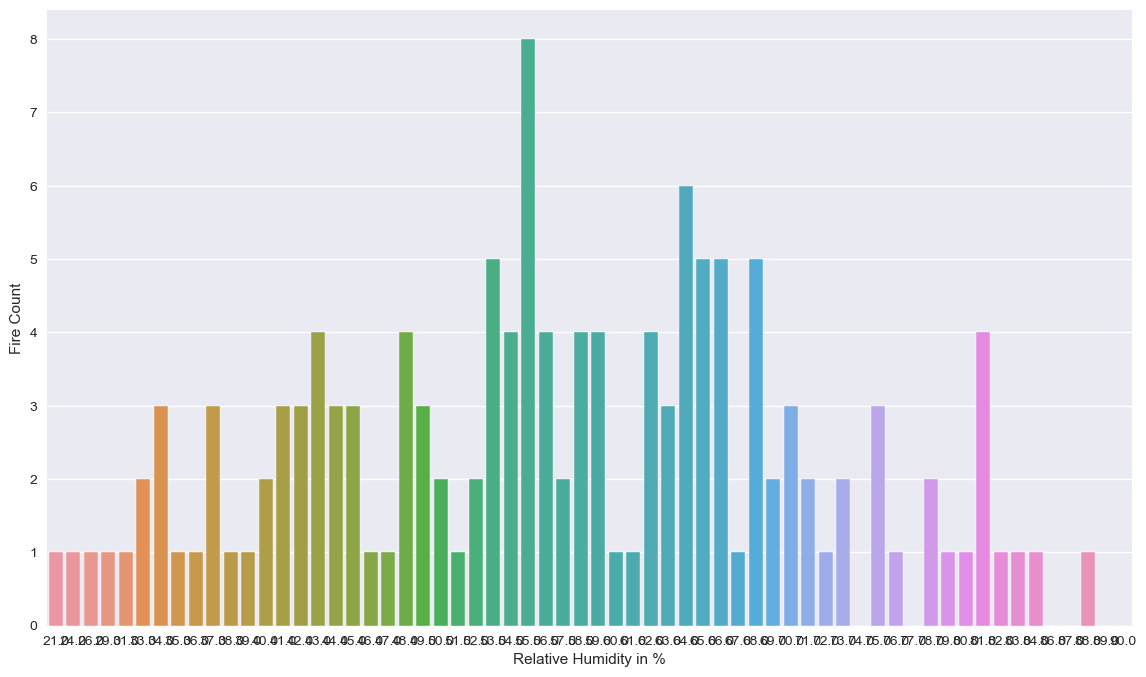

In [64]:
barchart('RH','Relative Humidity in %')

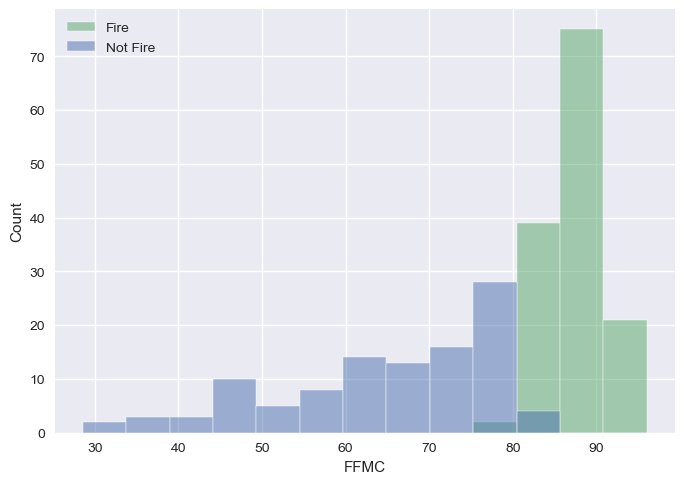

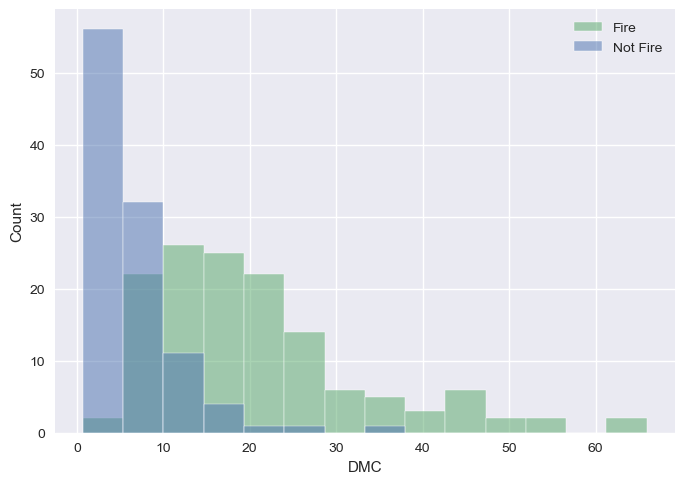

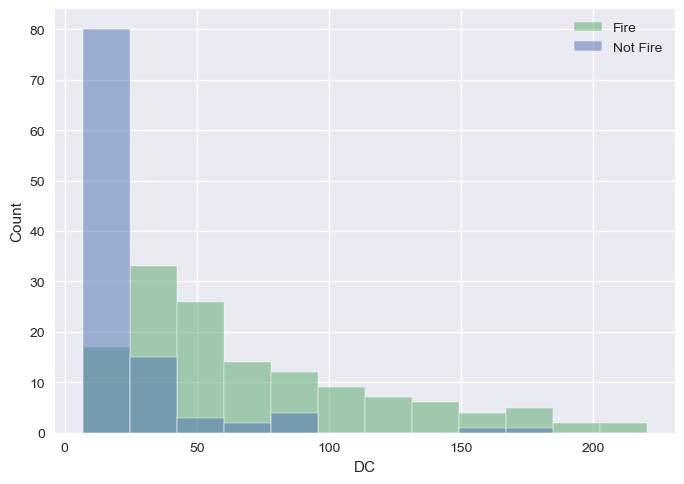

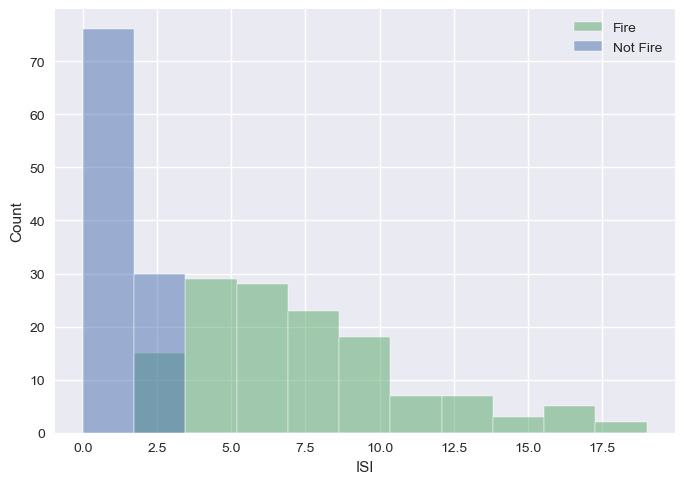

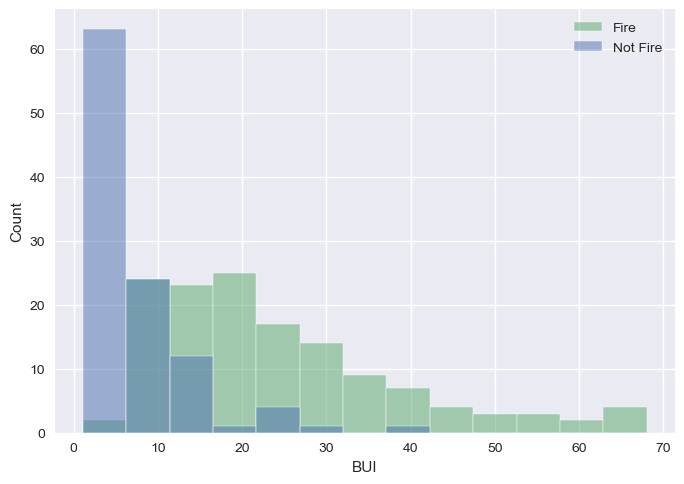

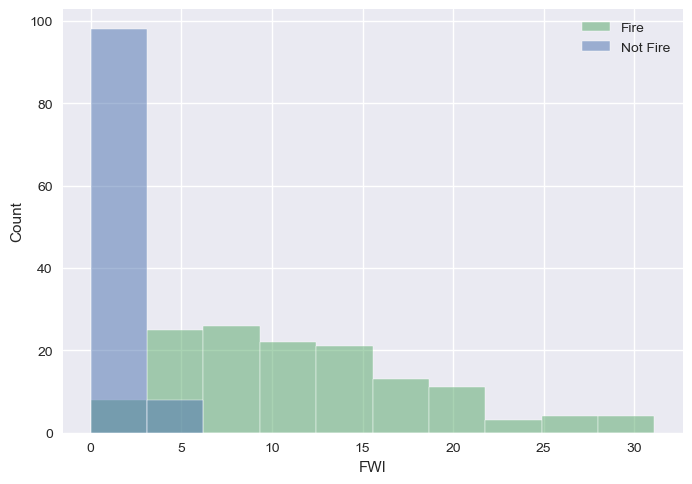

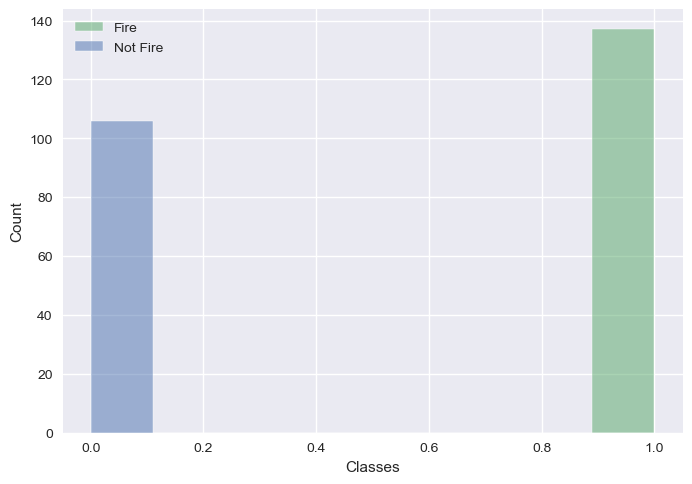

In [66]:
dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp, x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    #plt.title(feature)
    plt.show()

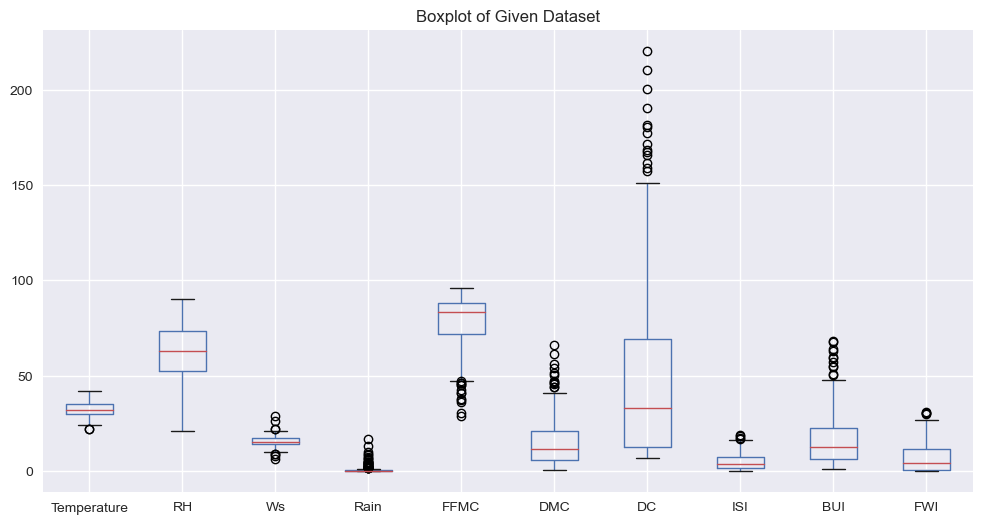

In [67]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

### REPORT 
#### Weather System Report
* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**


#### FWI System Components Report 
FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*, 
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*, 
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*, 
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*, 
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*, 
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*, 
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.